In [1]:
import numpy as np
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
# import dask.dataframe as pd
# from dask_ml.xgboost import XGBClassifier
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import norm 

In [2]:
dataset = pd.read_csv('EXL_EQ_2020_Train_datasets.csv', delimiter=",")

In [3]:
# dataset=dataset.iloc[:25000,:]

In [3]:
dataset.var33.describe()

count     300000
unique         6
top        other
freq      272972
Name: var33, dtype: object

In [4]:
dataset.head()

,cust_id,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var32,var33,var34,var35,var36,var37,var38,var39,var40,self_service_platform
0,100001,2667,0,0,1768,0,4,0,2,291016,...,0,other,Inactive,Standard,Video/Internet/Voice,N,NaN,Single Housing,N,Desktop
1,100002,435,0,0,515,0,3,0,0,137667,...,0,other,Never,Standard,Video/Internet,N,NaN,Single Housing,N,Desktop
2,100003,1520,0,0,2280,0,6,0,4,301567,...,0,other,Inactive,Standard,Video/Internet/Voice,N,Agent,Single Housing,Y,Desktop
3,100004,4393,0,1,5731,0,8,1,27,436735,...,1,other,Active,Standard,Internet Only,NaN,NaN,Single Housing,N,Desktop
4,100005,3587,0,0,2493,0,7,0,7,314970,...,0,movie_channel1,Never,Standard,Internet Only,N,NaN,Multi Housing,N,STB


In [5]:
# dataset["var33"].compute()

In [6]:
dataset["var33"].unique()

array(['other', 'movie_channel1', 'entertainment_channel1',
       'entertainment_channel2', 'news_channel1', 'news_channel2'],
      dtype=object)

In [7]:
dataset["var33"].isnull().sum()/(dataset["var33"].count()+dataset["var33"].isnull().sum())

0.0

In [8]:
dataset.var33=dataset.var33.astype('category').cat.codes

In [9]:
dataset["var34"].describe()

count     300000
unique         5
top        Never
freq      105758
Name: var34, dtype: object

In [10]:
dataset["var34"].unique()

array(['Inactive', 'Never', 'Active', 'Pending', 'Cancelled'],
      dtype=object)

In [11]:
dataset.var34=dataset.var34.astype('category').cat.codes

In [12]:
dataset["var35"].describe()

count       300000
unique           3
top       Standard
freq        283150
Name: var35, dtype: object

In [13]:
dataset["var35"].unique()

array(['Standard', 'CreditCard', 'Electronic Transfer'], dtype=object)

In [14]:
dataset.var35=dataset.var35.astype('category').cat.codes

In [15]:
dataset["var36"].describe()

count             295367
unique                14
top       Video/Internet
freq              104654
Name: var36, dtype: object

In [16]:
dataset["var36"].unique()

array(['Video/Internet/Voice', 'Video/Internet', 'Internet Only',
       'Internet/Voice', nan, 'Video Only', 'Homesecurity Only',
       'Video/Internet/Voice/Homesecurity', 'Internet/Homesecurity',
       'Video/Internet/Homesecurity', 'Video/Voice',
       'Internet/Voice/Homesecurity', 'Voice Only', 'Video/Homesecurity',
       'Video/Voice/Homesecurity'], dtype=object)

In [17]:
dataset.var36=dataset.var36.astype('category').cat.codes

In [18]:
dataset["var37"].describe()

count     280558
unique         2
top            N
freq      275860
Name: var37, dtype: object

In [19]:
dataset["var37"].unique()

array(['N', nan, 'Y'], dtype=object)

In [20]:
dataset["var37"].isnull().sum()/(dataset["var37"].count()+dataset["var37"].isnull().sum())

0.06480666666666667

In [21]:
dataset.var37=dataset.var37.replace(np.NaN,'N')

In [22]:
dataset.var37=dataset.var37.astype('category').cat.codes

In [23]:
dataset["var38"].describe()

count     114848
unique         3
top        Agent
freq       65235
Name: var38, dtype: object

In [24]:
dataset["var38"].unique()

array([nan, 'Agent', 'Self Service', 'Other'], dtype=object)

In [25]:
dataset["var38"].isnull().sum()/(dataset["var38"].count()+dataset["var38"].isnull().sum())

0.6171733333333334

In [26]:
dataset=dataset.drop(['var38'], axis = 1) 

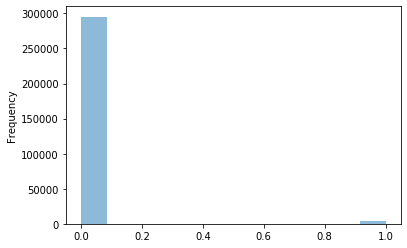

In [27]:
x = dataset["var37"].plot.hist(bins=12, alpha=0.5)

In [28]:
dataset["var39"].describe()

count             299978
unique                 5
top       Single Housing
freq              214816
Name: var39, dtype: object

In [29]:
dataset["var39"].unique()

array(['Single Housing', 'Multi Housing', 'Exclude mapping', 'Other',
       'Commercial', nan], dtype=object)

In [30]:
dataset["var39"].isnull().sum()/(dataset["var39"].count()+dataset["var39"].isnull().sum())

7.333333333333333e-05

In [31]:
dataset.var39=dataset.var39.replace(np.NaN,'Single Housing')

In [32]:
dataset.var39=dataset.var39.astype('category').cat.codes

In [33]:
dataset["var40"].describe()

count     300000
unique         2
top            N
freq      170475
Name: var40, dtype: object

In [34]:
dataset["var40"].unique()

array(['N', 'Y'], dtype=object)

In [35]:
dataset.var40=dataset.var40.astype('category').cat.codes

In [36]:
dataset["self_service_platform"].describe()

count      300000
unique          4
top       Desktop
freq       184194
Name: self_service_platform, dtype: object

In [37]:
dataset["self_service_platform"].unique()

array(['Desktop', 'STB', 'Mobile App', 'Mobile Web'], dtype=object)

In [38]:
def score_to_numeric(x):
    if x=='Desktop':
        return 1
    if x=='Mobile App':
        return 2
    if x=='Mobile Web':
        return 3
    if x=='STB':
        return 4

In [39]:
dataset['self_service_platform'] = dataset['self_service_platform'].apply(score_to_numeric)
dataset

,cust_id,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var31,var32,var33,var34,var35,var36,var37,var39,var40,self_service_platform
0,100001,2667,0,0,1768,0,4,0,2,291016,...,0,0,5,2,2,9,0,4,0,1
1,100002,435,0,0,515,0,3,0,0,137667,...,0,0,5,3,2,7,0,4,0,1
2,100003,1520,0,0,2280,0,6,0,4,301567,...,0,0,5,2,2,9,0,4,1,1
3,100004,4393,0,1,5731,0,8,1,27,436735,...,0,1,5,0,2,1,0,4,0,1
4,100005,3587,0,0,2493,0,7,0,7,314970,...,0,0,2,3,2,1,0,2,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,399996,53,0,0,74,0,0,0,0,59734,...,0,0,5,0,2,1,0,2,1,1
299996,399997,4083,0,0,3244,0,8,0,10,349569,...,0,0,5,4,2,1,0,4,0,3
299997,399998,2730,0,0,2432,0,4,0,5,264067,...,0,0,5,4,2,1,0,2,0,1
299998,399999,2875,0,0,2321,0,4,0,1,295776,...,0,0,5,4,2,7,0,4,1,1


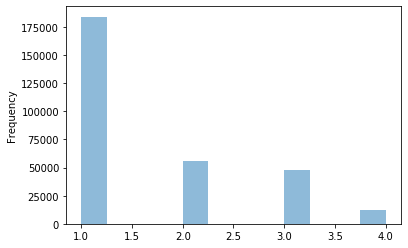

In [40]:
x = dataset["self_service_platform"].plot.hist(bins=12, alpha=0.5)

In [41]:
dataset.head()

,cust_id,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var31,var32,var33,var34,var35,var36,var37,var39,var40,self_service_platform
0,100001,2667,0,0,1768,0,4,0,2,291016,...,0,0,5,2,2,9,0,4,0,1
1,100002,435,0,0,515,0,3,0,0,137667,...,0,0,5,3,2,7,0,4,0,1
2,100003,1520,0,0,2280,0,6,0,4,301567,...,0,0,5,2,2,9,0,4,1,1
3,100004,4393,0,1,5731,0,8,1,27,436735,...,0,1,5,0,2,1,0,4,0,1
4,100005,3587,0,0,2493,0,7,0,7,314970,...,0,0,2,3,2,1,0,2,0,4


In [42]:
dataset["var24"].describe()

count    290084.000000
mean         10.366787
std          19.296733
min           0.000000
25%           0.000000
50%           0.000000
75%          16.000000
max         148.000000
Name: var24, dtype: float64

In [43]:
dataset.var24=dataset.var24.replace(np.NaN,0)

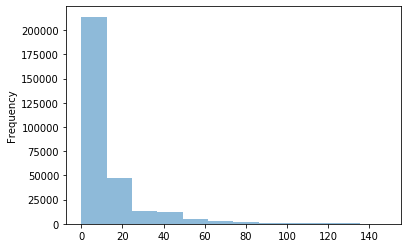

In [44]:
x = dataset["var24"].plot.hist(bins=12, alpha=0.5)

In [45]:
dataset=dataset.drop(["var30"],axis=1)

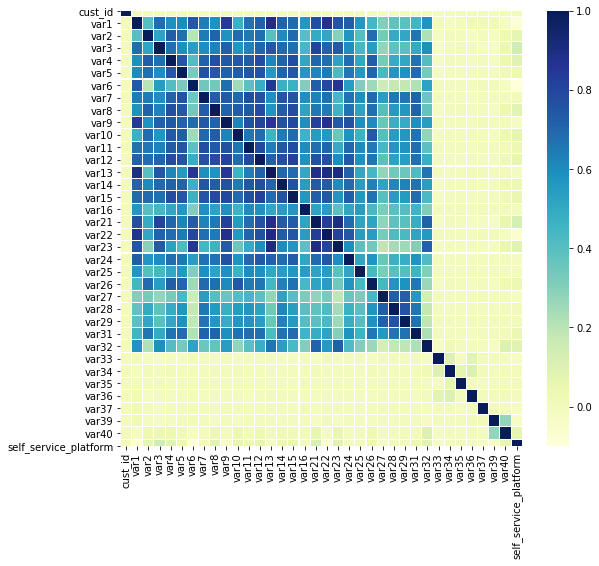

In [46]:
corrmat = dataset.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

In [47]:
# # Create correlation matrix
# corr_matrix = dataset.corr().abs()

# # Select upper triangle of correlation matrix
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# # Find index of feature columns with correlation greater than 0.95
# to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]

In [48]:
X = dataset.drop(['self_service_platform'], axis=1)
y = dataset.self_service_platform
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.7, random_state=1234)

In [49]:
categorical_features_indices = np.where(X.dtypes != np.float)[0]

In [50]:
X_train

,cust_id,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var29,var31,var32,var33,var34,var35,var36,var37,var39,var40
25607,125608,88,0,0,32,0,0,0,0,76894,...,0,0,0,5,4,2,7,0,4,0
214159,314160,4127,0,0,3466,0,7,0,8,340304,...,2,0,0,5,4,2,1,0,4,1
6119,106120,977,0,1,6889,0,8,0,27,303857,...,8,0,1,5,3,2,7,0,4,1
247879,347880,2716,0,1,8715,0,6,0,23,351680,...,6,0,0,5,3,0,9,0,4,0
245542,345543,9673,0,1,12052,1,9,9,38,1014994,...,22,0,1,5,3,2,5,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9449,109450,945,0,1,6468,0,7,0,28,249332,...,7,0,1,5,4,2,7,0,4,0
41239,141240,2829,0,1,5155,0,6,1,32,307028,...,7,0,1,5,4,2,9,0,2,1
294543,394544,7331,0,1,5779,0,8,1,16,396417,...,10,0,1,5,4,2,7,0,4,1
220532,320533,1604,0,0,1244,0,4,0,2,301667,...,0,0,0,5,4,2,5,0,4,1


In [77]:
from dask_ml.xgboost import XGBClassifier

In [78]:
#Import libraries:
import pandas as pd
import numpy as np
# import xgboost as xgb
from xgboost import XGBClassifier
# from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV  #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4


In [80]:
# fit model no training data
model = XGBClassifier(learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=3, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=None, n_estimators=140, n_jobs=1,
              nthread=4, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, verbosity=1)

In [81]:
prediction =model.predict(X_validation)
prediction

array([1, 1, 1, ..., 3, 1, 1], dtype=int64)

In [82]:

3
# evaluate predictions
accuracy = accuracy_score(y_validation, prediction)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 73.28%


# Random Forest

In [52]:
import math
from sklearn.ensemble import RandomForestClassifier 
  
 # create regressor object 
regressor = RandomForestClassifier( random_state = 0) 

In [53]:
# fit model no training data
# regressor = XGBClassifier()
regressor.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [54]:
prediction =regressor.predict(X_validation)

In [55]:
prediction

array([1, 1, 2, ..., 1, 1, 1], dtype=int64)

In [56]:
y_validation

295649    1
166698    1
106982    4
101959    1
23927     3
         ..
3304      1
61635     2
203445    1
216055    1
33340     1
Name: self_service_platform, Length: 90000, dtype: int64

In [57]:

3
# evaluate predictions
accuracy = accuracy_score(y_validation, prediction)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 74.64%


In [95]:
dataset_test = pd.read_csv('EXL_EQ_2020_Test_Datasets.csv', delimiter=",")

In [96]:
dataset_test["var33"].unique()

array(['other', 'news_channel1', 'entertainment_channel2',
       'news_channel2', 'movie_channel1', 'entertainment_channel1'],
      dtype=object)

In [97]:
dataset_test["var33"].isnull().sum()/(dataset_test["var33"].count()+dataset_test["var33"].isnull().sum())

0.0

In [98]:
dataset_test.var33=dataset_test.var33.astype('category').cat.codes

In [99]:
dataset_test["var34"].describe()

count     300000
unique         5
top        Never
freq      105848
Name: var34, dtype: object

In [100]:
dataset_test["var34"].unique()

array(['Pending', 'Inactive', 'Active', 'Never', 'Cancelled'],
      dtype=object)

In [101]:
dataset_test.var34=dataset.var34.astype('category').cat.codes

In [102]:
dataset_test["var35"].describe()

count       299998
unique           3
top       Standard
freq        283187
Name: var35, dtype: object

In [103]:
dataset_test["var35"].unique()

array(['Standard', 'Electronic Transfer', 'CreditCard', nan], dtype=object)

In [104]:
dataset_test.var35=dataset_test.var35.astype('category').cat.codes

In [105]:
dataset_test["var36"].describe()

count             295256
unique                14
top       Video/Internet
freq              104073
Name: var36, dtype: object

In [106]:
dataset_test["var36"].unique()

array(['Video/Internet/Voice', 'Internet Only', 'Video/Internet',
       'Video Only', 'Video/Internet/Homesecurity',
       'Video/Internet/Voice/Homesecurity', 'Internet/Homesecurity',
       'Internet/Voice', nan, 'Video/Voice', 'Homesecurity Only',
       'Internet/Voice/Homesecurity', 'Voice Only', 'Video/Homesecurity',
       'Video/Voice/Homesecurity'], dtype=object)

In [107]:
dataset_test.var36=dataset_test.var36.astype('category').cat.codes

In [108]:
dataset_test["var37"].describe()

count     280567
unique         2
top            N
freq      275779
Name: var37, dtype: object

In [109]:
dataset_test["var37"].unique()

array(['N', nan, 'Y'], dtype=object)

In [110]:
dataset_test["var37"].isnull().sum()/(dataset_test["var37"].count()+dataset_test["var37"].isnull().sum())

0.06477666666666666

In [111]:
dataset_test.var37=dataset_test.var37.replace(np.NaN,'N')

In [112]:
dataset_test.var37=dataset_test.var37.astype('category').cat.codes

In [113]:
dataset_test["var38"].describe()

count     115413
unique         3
top        Agent
freq       65540
Name: var38, dtype: object

In [114]:
dataset_test["var38"].unique()

array([nan, 'Other', 'Self Service', 'Agent'], dtype=object)

In [115]:
dataset_test["var38"].isnull().sum()/(dataset_test["var38"].count()+dataset_test["var38"].isnull().sum())

0.61529

In [116]:
dataset_test=dataset_test.drop(['var38'], axis = 1) 

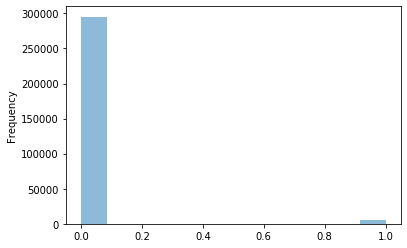

In [117]:
x = dataset_test["var37"].plot.hist(bins=12, alpha=0.5)

In [118]:
dataset_test["var39"].describe()

count             299988
unique                 5
top       Single Housing
freq              214933
Name: var39, dtype: object

In [119]:
dataset_test["var39"].unique()

array(['Single Housing', 'Multi Housing', 'Commercial', 'Exclude mapping',
       'Other', nan], dtype=object)

In [120]:
dataset_test["var39"].isnull().sum()/(dataset_test["var39"].count()+dataset_test["var39"].isnull().sum())

4e-05

In [121]:
dataset_test.var39=dataset_test.var39.replace(np.NaN,'Single Housing')

In [122]:
dataset_test.var39=dataset_test.var39.astype('category').cat.codes

In [123]:
dataset_test["var40"].describe()

count     300000
unique         2
top            N
freq      170676
Name: var40, dtype: object

In [124]:
dataset_test["var40"].unique()

array(['N', 'Y'], dtype=object)

In [125]:
dataset_test.var40=dataset.var40.astype('category').cat.codes

In [126]:
dataset_test.var24=dataset.var24.replace(np.NaN,0)

In [127]:
dataset_test=dataset_test.drop(["var30"],axis=1)

In [128]:
dataset_test

,cust_id,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var29,var31,var32,var33,var34,var35,var36,var37,var39,var40
0,400001,2871,0,0,1925,0,7,0,1,238388,...,0,0,0,5,2,2,9,0,4,0
1,400002,562,0,0,197,0,3,0,0,136782,...,0,0,0,5,3,2,1,0,4,0
2,400003,4350,0,1,5664,0,8,1,25,336602,...,8,0,1,5,2,2,7,0,4,1
3,400004,7580,0,1,6093,0,8,4,31,501694,...,10,0,1,5,0,2,1,0,4,0
4,400005,58,0,0,53,0,0,0,0,87465,...,0,0,0,5,3,2,7,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,699996,7688,0,1,6161,0,9,3,27,518475,...,10,0,1,5,0,2,1,1,4,1
299996,699997,330,0,0,499,0,3,0,0,149122,...,0,0,0,5,4,2,7,0,4,0
299997,699998,1223,0,0,4335,0,5,0,9,277072,...,5,0,1,1,4,2,7,0,4,0
299998,699999,9078,0,1,7949,3,9,16,66,783744,...,24,1,1,5,4,2,9,0,4,1


In [129]:
prediction =regressor.predict(dataset_test)
prediction

array([1, 1, 3, ..., 2, 1, 1], dtype=int64)

In [131]:
dataset_test["prediction"]=prediction

In [132]:
dataset_test.to_csv(r'result.csv', index = False)